# Task 2 : Unsupervised Clustering 
# Author: Sukaina Asad
Predict optimal number of clusters for Iris Dataset


In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#load our dataset
from sklearn import datasets
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x= iris_df.iloc[:,[0,1,2,3]].values

In order to determine the optimal clusters using elbow method. Within Cluster Squared Sum (WCSS) should be as low as possible for the clusters. 

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

#iterating from 1-10
for k in range(1,11):
  kmeans = KMeans(k)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.472230158730156,
 39.066035353535355,
 34.420191786283894,
 30.063110617452725,
 28.16290255796835,
 26.174561706473035]

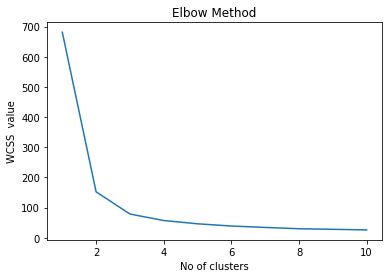

In [ ]:
#now visually analyse the graph as decide the optimal value for k 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS  value')
plt.show()

According to the above graph, optimal number of clusters should be 3 

# Applying K-Means for 3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x)

# Visualization 

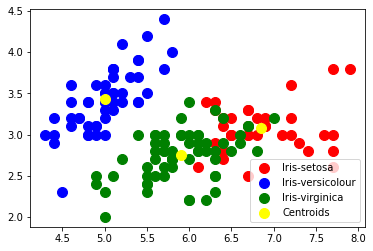

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()